In [1]:
import numpy as np
import pandas as pd 
   


In [2]:
result=pd.read_csv('/content/preprocessed_ade.csv')

In [3]:
result

,Unnamed: 0,observation,labels
0,12606,early phase ii semi double blind study of the ...,0
1,685,cessation of mtx therapy led to complete regre...,0
2,5127,cutaneous biopsy showed hyphae and round inclu...,0
3,3158,she was treated with acyclovir and subsequentl...,1
4,10685,cisplatin was substituted and the patient achi...,0
...,...,...,...
23511,982,ticlopidine induced aplastic anemia two new c...,1
23512,14487,the risks of sumatriptan administration in pat...,0
23513,4680,however the spectrum of hosts and clinical p...,0
23514,2588,antibiotic treatment should be continued,0


In [4]:
#count vectorizing 

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
cv = CountVectorizer(max_features=500)
x= cv.fit_transform(result['observation']).toarray() 

In [7]:
y=result['labels']

In [8]:
print(x.shape)
print(y.shape)

(23516, 500)
(23516,)


In [9]:
result['labels'].value_counts()

0    16695
1     6821
Name: labels, dtype: int64

 **SPLITTING THE DATASET INTO TRAINING AND TESTING**

In [10]:
from sklearn.model_selection import train_test_split 

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2021) 

In [12]:
print(x_train.shape)
print(x_test.shape)


(18812, 500)
(4704, 500)


In [13]:
zerocount=0
onecount=0
for i in y_train:
  if i == 0:
    zerocount+=1
  else:
    onecount+=1
print("no of negative sample in training class is:",zerocount)
print("no of positive sample in training class is:",onecount)

no of negative sample in training class is: 13335
no of positive sample in training class is: 5477


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model=LogisticRegression(max_iter=1000)

In [ ]:
log_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_y_pred=log_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report ,accuracy_score

In [ ]:
print(confusion_matrix(y_test,log_y_pred))

[[3076  284]
 [ 520  824]]


In [ ]:
print((classification_report(y_test,log_y_pred))) 

              precision    recall  f1-score   support

           0       0.86      0.92      0.88      3360
           1       0.74      0.61      0.67      1344

    accuracy                           0.83      4704
   macro avg       0.80      0.76      0.78      4704
weighted avg       0.82      0.83      0.82      4704



In [ ]:
#calculate training error 
log_y_pred_train = log_model.predict(x_train)

In [ ]:
print((classification_report(y_train,log_y_pred_train)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     13335
           1       0.77      0.63      0.70      5477

    accuracy                           0.84     18812
   macro avg       0.82      0.78      0.79     18812
weighted avg       0.84      0.84      0.83     18812



In [ ]:
accuracy_score(y_train,log_y_pred_train)

0.8396236444822454

**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model=DecisionTreeClassifier(max_depth= 5)

In [ ]:
dt_model.fit(x_train,y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_pred=dt_model.predict(x_test)

In [ ]:
print(classification_report(y_test,dt_pred)) 

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3360
           1       0.68      0.42      0.52      1344

    accuracy                           0.78      4704
   macro avg       0.74      0.67      0.69      4704
weighted avg       0.77      0.78      0.76      4704



In [ ]:
print(confusion_matrix(y_test,dt_pred))

[[3102  258]
 [ 784  560]]


In [ ]:
dt_pred_train = dt_model.predict(x_train)

In [ ]:
 accuracy_score(y_train,dt_pred_train )

0.7851903040612375

**RANDOM FOREST MODEL**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc_model=RandomForestClassifier(n_estimators=1000,max_leaf_nodes=80)

In [ ]:
rfc_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=80, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred=rfc_model.predict(x_test)

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      3360
           1       0.82      0.39      0.53      1344

    accuracy                           0.80      4704
   macro avg       0.81      0.68      0.70      4704
weighted avg       0.80      0.80      0.77      4704



In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[3246  114]
 [ 825  519]]


In [ ]:
rfc_train = rfc_model.predict(x_train)

In [ ]:
accuracy_score(y_train,rfc_train)

0.8062406974271742

**NAIVE BAYES MODEL** 

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [ ]:
gnb_model=GaussianNB()
mnb_model=MultinomialNB()

In [ ]:
gnb_model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
mnb_model.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
gnb_pred=gnb_model.predict(x_test)

In [ ]:
mnb_pred=mnb_model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,gnb_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      3360
           1       0.54      0.72      0.61      1344

    accuracy                           0.74      4704
   macro avg       0.70      0.74      0.71      4704
weighted avg       0.77      0.74      0.75      4704



In [ ]:
print(classification_report(y_test,mnb_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3360
           1       0.67      0.64      0.65      1344

    accuracy                           0.81      4704
   macro avg       0.76      0.76      0.76      4704
weighted avg       0.80      0.81      0.80      4704



In [ ]:
print(confusion_matrix(y_test,gnb_pred)) 

[[2525  835]
 [ 378  966]]


In [ ]:
print(confusion_matrix(y_test,mnb_pred))

[[2939  421]
 [ 490  854]]


In [ ]:
gnb_train_pred = gnb_model.predict(x_train)

In [ ]:
accuracy_score(y_train,gnb_train_pred)

0.7495747395279608

In [ ]:
mnb_train_pred = mnb_model.predict(x_train)

In [ ]:
accuracy_score(y_train,mnb_train_pred)

0.8008186264086753

**XG BOOSTING**

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model=XGBClassifier()

In [ ]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_pred = xgb_model.predict(x_test)

In [ ]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      3360
           1       0.78      0.44      0.56      1344

    accuracy                           0.80      4704
   macro avg       0.79      0.69      0.72      4704
weighted avg       0.80      0.80      0.78      4704



In [ ]:
print(confusion_matrix(y_test,xgb_pred))   

[[3194  166]
 [ 756  588]]


In [ ]:
xgb_pred_train = xgb_model.predict(x_train)

In [ ]:
accuracy_score(y_train,xgb_pred_train) 

0.8119817137997023

In [14]:
from tensorflow .keras.models import Sequential

from tensorflow.keras.layers import Dense,LSTM,Embedding


In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(18812, 500)
(18812,)
(4704, 500)
(4704,)


In [16]:
import nltk

In [17]:
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords') 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
tokens = [word_tokenize(sen) for sen in result['observation']]

In [19]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

In [20]:
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

def remove_stop_words(tokens): 
    return [word for word in tokens if word not in stoplist]


In [21]:
filtered_words = [remove_stop_words(sen) for sen in lower_tokens]

In [22]:
res = [' '.join(sen) for sen in filtered_words]  

In [23]:
result['tokens'] = filtered_words 

In [24]:
result

,Unnamed: 0,observation,labels,tokens
0,12606,early phase ii semi double blind study of the ...,0,"[early, phase, ii, semi, double, blind, study,..."
1,685,cessation of mtx therapy led to complete regre...,0,"[cessation, mtx, therapy, led, complete, regre..."
2,5127,cutaneous biopsy showed hyphae and round inclu...,0,"[cutaneous, biopsy, showed, hyphae, round, inc..."
3,3158,she was treated with acyclovir and subsequentl...,1,"[treated, acyclovir, subsequently, developed, ..."
4,10685,cisplatin was substituted and the patient achi...,0,"[cisplatin, substituted, patient, achieved, co..."
...,...,...,...,...
23511,982,ticlopidine induced aplastic anemia two new c...,1,"[ticlopidine, induced, aplastic, anemia, two, ..."
23512,14487,the risks of sumatriptan administration in pat...,0,"[risks, sumatriptan, administration, patients,..."
23513,4680,however the spectrum of hosts and clinical p...,0,"[however, spectrum, hosts, clinical, presentat..."
23514,2588,antibiotic treatment should be continued,0,"[antibiotic, treatment, continued]"


In [25]:
sentence_lengths = [len(tokens) for tokens in result["tokens"]]
print("Max sentence length is %s" % max(sentence_lengths))

Max sentence length is 65


In [26]:
rnn_model=Sequential()

rnn_model.add(Embedding(500, 64, input_length=65))

rnn_model.add(LSTM(192))

rnn_model.add(Dense(1, activation='sigmoid'))  

In [27]:
rnn_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])


In [28]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 65, 64)            32000     
_________________________________________________________________
lstm (LSTM)                  (None, 192)               197376    
_________________________________________________________________
dense (Dense)                (None, 1)                 193       
Total params: 229,569
Trainable params: 229,569
Non-trainable params: 0
_________________________________________________________________


In [30]:
history=rnn_model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 5,batch_size=500) 

Epoch 1/5
38/38 [==============================] - 379s 10s/step - loss: 0.6043 - accuracy: 0.7089 - val_loss: 0.5874 - val_accuracy: 0.7143
Epoch 2/5
38/38 [==============================] - 385s 10s/step - loss: 0.5876 - accuracy: 0.7104 - val_loss: 0.5811 - val_accuracy: 0.7232
Epoch 3/5
38/38 [==============================] - 338s 9s/step - loss: 0.5828 - accuracy: 0.7139 - val_loss: 0.5726 - val_accuracy: 0.7177
Epoch 4/5
38/38 [==============================] - 331s 9s/step - loss: 0.5835 - accuracy: 0.7099 - val_loss: 0.5739 - val_accuracy: 0.7228
Epoch 5/5
38/38 [==============================] - 329s 9s/step - loss: 0.5823 - accuracy: 0.7150 - val_loss: 0.5694 - val_accuracy: 0.7224


In [31]:
import matplotlib.pyplot as plt


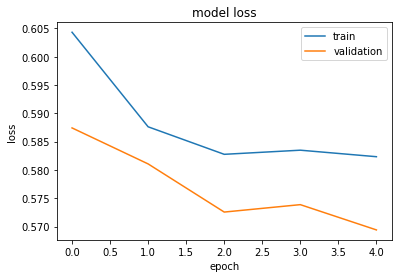

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show() 

In [35]:
import tensorflow as tf


In [36]:
rnn_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.SpecificityAtSensitivity(0.5)])
 

In [37]:
rnn_model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 5,batch_size=500) 

Epoch 1/5
38/38 [==============================] - 333s 9s/step - loss: 0.5856 - precision: 0.5462 - recall: 0.0712 - specificity_at_sensitivity: 0.6488 - val_loss: 0.5744 - val_precision: 0.5825 - val_recall: 0.0446 - val_specificity_at_sensitivity: 0.6958
Epoch 2/5
38/38 [==============================] - 328s 9s/step - loss: 0.5822 - precision: 0.5581 - recall: 0.0816 - specificity_at_sensitivity: 0.6739 - val_loss: 0.5905 - val_precision: 0.5106 - val_recall: 0.1257 - val_specificity_at_sensitivity: 0.6515
Epoch 3/5
38/38 [==============================] - 328s 9s/step - loss: 0.5851 - precision: 0.5471 - recall: 0.0509 - specificity_at_sensitivity: 0.6746 - val_loss: 0.5707 - val_precision: 0.5749 - val_recall: 0.1057 - val_specificity_at_sensitivity: 0.7074
Epoch 4/5
38/38 [==============================] - 326s 9s/step - loss: 0.5807 - precision: 0.5618 - recall: 0.0955 - specificity_at_sensitivity: 0.6721 - val_loss: 0.5679 - val_precision: 0.6101 - val_recall: 0.0990 - val_spe

In [39]:
rnn_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=[tf.keras.metrics.TrueNegatives(),tf.keras.metrics.TruePositives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives()])


In [40]:
rnn_model.fit(
    x_train,y_train,
    validation_data = (x_test,y_test),
    epochs = 5,batch_size=500)  

Epoch 1/5
38/38 [==============================] - 358s 9s/step - loss: 0.5809 - true_negatives_1: 12974.0000 - true_positives_1: 501.0000 - false_positives_1: 361.0000 - false_negatives_1: 4976.0000 - val_loss: 0.5692 - val_true_negatives_1: 3299.0000 - val_true_positives_1: 92.0000 - val_false_positives_1: 61.0000 - val_false_negatives_1: 1252.0000
Epoch 2/5
38/38 [==============================] - 327s 9s/step - loss: 0.5810 - true_negatives_1: 12984.0000 - true_positives_1: 460.0000 - false_positives_1: 351.0000 - false_negatives_1: 5017.0000 - val_loss: 0.5677 - val_true_negatives_1: 3210.0000 - val_true_positives_1: 192.0000 - val_false_positives_1: 150.0000 - val_false_negatives_1: 1152.0000
Epoch 3/5
38/38 [==============================] - 326s 9s/step - loss: 0.5824 - true_negatives_1: 13033.0000 - true_positives_1: 413.0000 - false_positives_1: 302.0000 - false_negatives_1: 5064.0000 - val_loss: 0.5723 - val_true_negatives_1: 3299.0000 - val_true_positives_1: 95.0000 - val_f